In [1]:
import os

# Define root path
root_dir = '/kaggle/working/custom_dataset'

# Define categories
categories = ['potato', 'tomato']
subcategories = ['disease', 'healthy']

# Create folders
for category in categories:
    for sub in subcategories:
        path = os.path.join(root_dir, category, sub)
        os.makedirs(path, exist_ok=True)

print("Custom dataset folders created successfully!")

Custom dataset folders created successfully!


In [2]:
import os
import shutil
import random

# Define paths
source_base = '/kaggle/input/potato-crop-disease-and-health-dataset/potato'
target_disease = '/kaggle/working/custom_dataset/potato/disease'
target_healthy = '/kaggle/working/custom_dataset/potato/healthy'

# Disease categories and samples per class
disease_classes = ['common_scab', 'cut', 'dry_rot', 'gangrene', 'violet_root_rot']
samples_per_disease = 500
samples_healthy = 2500

# Create directories
os.makedirs(target_disease, exist_ok=True)
os.makedirs(target_healthy, exist_ok=True)

# Copy disease samples
for disease in disease_classes:
    src_path = os.path.join(source_base, disease)
    images = os.listdir(src_path)
    selected = random.sample(images, samples_per_disease)

    for img in selected:
        shutil.copy(os.path.join(src_path, img), os.path.join(target_disease, f"{disease}_{img}"))

# Copy healthy samples
healthy_path = os.path.join(source_base, 'healthy')
healthy_images = os.listdir(healthy_path)
selected_healthy = random.sample(healthy_images, samples_healthy)

for img in selected_healthy:
    shutil.copy(os.path.join(healthy_path, img), os.path.join(target_healthy, img))

print("Potato dataset subset created successfully.")

Potato dataset subset created successfully.


In [3]:
import os
import shutil
import random

# Source directories
source_base = '/kaggle/input/tomatoes-dataset/content/ieee-mbl-cls/train'
target_disease = '/kaggle/working/custom_dataset/tomato/disease'
target_healthy = '/kaggle/working/custom_dataset/tomato/healthy'

# Create directories
os.makedirs(target_disease, exist_ok=True)
os.makedirs(target_healthy, exist_ok=True)

# Set random seed for reproducibility
random.seed(42)

# --- Disease: Damaged (all) + Old (partial)
# Damaged
damaged_dir = os.path.join(source_base, 'Damaged')
damaged_images = os.listdir(damaged_dir)
for img in damaged_images:
    shutil.copy(os.path.join(damaged_dir, img), os.path.join(target_disease, f'damaged_{img}'))

# Old (partial)
old_dir = os.path.join(source_base, 'Old')
old_images = os.listdir(old_dir)
selected_old = random.sample(old_images, 1551)
for img in selected_old:
    shutil.copy(os.path.join(old_dir, img), os.path.join(target_disease, f'old_{img}'))

# --- Healthy: Ripe (1375) + Unripe (1125)
# Ripe
ripe_dir = os.path.join(source_base, 'Ripe')
ripe_images = os.listdir(ripe_dir)
selected_ripe = random.sample(ripe_images, 1375)
for img in selected_ripe:
    shutil.copy(os.path.join(ripe_dir, img), os.path.join(target_healthy, f'ripe_{img}'))

# Unripe
unripe_dir = os.path.join(source_base, 'Unripe')
unripe_images = os.listdir(unripe_dir)
selected_unripe = random.sample(unripe_images, 1125)
for img in selected_unripe:
    shutil.copy(os.path.join(unripe_dir, img), os.path.join(target_healthy, f'unripe_{img}'))

print("Tomato dataset subset created successfully.")

Tomato dataset subset created successfully.


In [4]:
import shutil

# Zip the folder
shutil.make_archive('/kaggle/working/custom_dataset', 'zip', '/kaggle/working/custom_dataset')

print("Zipping complete. You can now download the zip file.")

Zipping complete. You can now download the zip file.


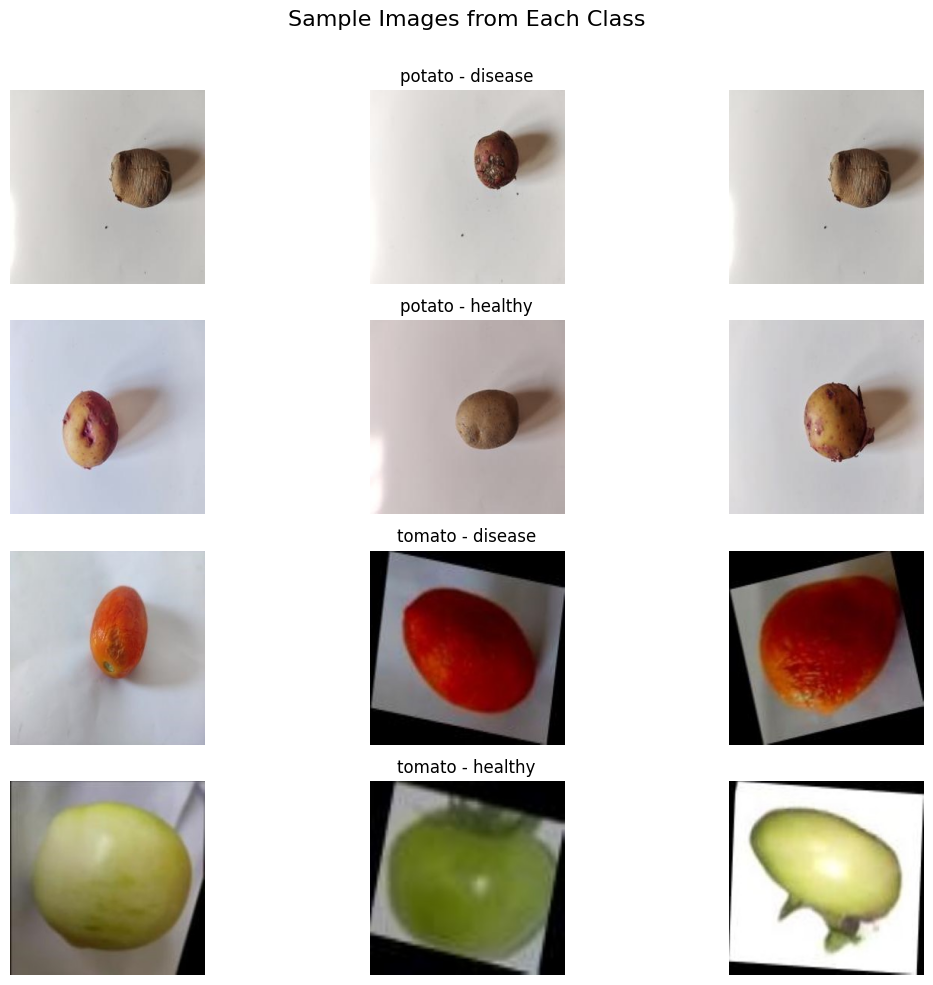

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Base directory of your dataset
dest_base = '/kaggle/working/custom_dataset'

# Define categories
categories = [
    'potato/disease',
    'potato/healthy',
    'tomato/disease',
    'tomato/healthy'
]

# Create the plot
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
fig.suptitle('Sample Images from Each Class', fontsize=16)

for i, category in enumerate(categories):
    class_path = os.path.join(dest_base, category)
    image_files = os.listdir(class_path)
    sample_imgs = random.sample(image_files, 3)

    for j in range(3):
        img_path = os.path.join(class_path, sample_imgs[j])
        img = mpimg.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 1:
            axes[i, j].set_title(category.replace('/', ' - '), fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make room for the main title
plt.show()


In [6]:
import os

# Base path of custom dataset
dataset_base = '/kaggle/working/custom_dataset'

# Define classes
categories = [
    'potato/disease',
    'potato/healthy',
    'tomato/disease',
    'tomato/healthy'
]

# Count and print
print("Sample count per class:\n")
for category in categories:
    class_path = os.path.join(dataset_base, category)
    count = len(os.listdir(class_path))
    print(f"{category}: {count} images")


Sample count per class:

potato/disease: 2500 images
potato/healthy: 2500 images
tomato/disease: 2500 images
tomato/healthy: 2500 images


In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
original_dataset_dir = '/kaggle/working/custom_dataset'
output_dir = '/kaggle/working/custom_dataset_split'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

val_split = 0.2  # 20% for validation

# Iterate over crop type and health status
for crop in os.listdir(original_dataset_dir):
    crop_path = os.path.join(original_dataset_dir, crop)
    
    for condition in os.listdir(crop_path):
        class_path = os.path.join(crop_path, condition)
        images = os.listdir(class_path)

        # Split the images
        train_images, val_images = train_test_split(images, test_size=val_split, random_state=42, shuffle=True)

        # Create destination directories
        train_class_dir = os.path.join(train_dir, crop, condition)
        val_class_dir = os.path.join(val_dir, crop, condition)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        # Copy files
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_class_dir, img))

print("✅ Custom dataset successfully split into training and validation sets.")

✅ Custom dataset successfully split into training and validation sets.


In [8]:
import os
import pandas as pd

# Base directories
base_dirs = [
    '/kaggle/working/custom_dataset_split/train',
    '/kaggle/working/custom_dataset_split/val'
]

# Lists to store metadata
filenames, crops, conditions = [], [], []

# Loop through each directory
for base_dir in base_dirs:
    for crop in os.listdir(base_dir):
        crop_path = os.path.join(base_dir, crop)
        if not os.path.isdir(crop_path):
            continue

        for condition in os.listdir(crop_path):
            condition_path = os.path.join(crop_path, condition)
            if not os.path.isdir(condition_path):
                continue

            for file in os.listdir(condition_path):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    rel_path = os.path.join(os.path.basename(base_dir), crop, condition, file)
                    filenames.append(rel_path)
                    crops.append(crop.lower())
                    conditions.append(condition.lower())

# Create DataFrame
df = pd.DataFrame({
    'filename': filenames,
    'crop': crops,
    'condition': conditions
})

# Save as CSV
df.to_csv('/kaggle/working/custom_metadata.csv', index=False)
print("✅ Metadata CSV created (without split info)")

✅ Metadata CSV created (without split info)


In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels
crop_encoder = LabelEncoder()
condition_encoder = LabelEncoder()

df['crop_encoded'] = crop_encoder.fit_transform(df['crop'])
df['condition_encoded'] = condition_encoder.fit_transform(df['condition'])

# One-hot encode
crop_labels = to_categorical(df['crop_encoded'])
condition_labels = to_categorical(df['condition_encoded'])

2025-07-15 06:54:25.598331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752562465.801887      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752562465.863648      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
# Add individual columns for one-hot encoded labels
crop_classes = pd.DataFrame(crop_labels, columns=[f'crop_{cls}' for cls in crop_encoder.classes_])
condition_classes = pd.DataFrame(condition_labels, columns=[f'condition_{cls}' for cls in condition_encoder.classes_])

df = pd.concat([df, crop_classes, condition_classes], axis=1)


crop_cols = [col for col in df.columns if col.startswith('crop_')]
cond_cols = [col for col in df.columns if col.startswith('condition_')]

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
   rescale=1./255,
    rotation_range=40,  # Increase rotation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,  # Increase zoom
    horizontal_flip=True,
    vertical_flip=True,  # Add vertical flip for more variability
    brightness_range=[0.7, 1.3],  # Adjust brightness
    channel_shift_range=20.0,  # Random channel shifts
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_df = df[df['filename'].str.startswith('train')]
val_df = df[df['filename'].str.startswith('val')]

crop_cols = crop_classes.columns.tolist()
cond_cols = condition_classes.columns.tolist()

combined_y_cols = crop_cols + cond_cols

train_generator_raw = train_datagen.flow_from_dataframe(
    train_df,
    directory='/kaggle/working/custom_dataset_split',
    x_col='filename',
    y_col=combined_y_cols,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw'
)
val_generator_raw = val_datagen.flow_from_dataframe(
    val_df,
    directory='/kaggle/working/custom_dataset_split',
    x_col='filename',
    y_col=combined_y_cols,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw',
    shuffle=False
)


Found 8000 validated image filenames.
Found 2000 validated image filenames.


In [12]:
print("Train crop classes:", train_df['crop'].unique())
print("Val crop classes:", val_df['crop'].unique())

Train crop classes: ['potato' 'tomato']
Val crop classes: ['potato' 'tomato']


In [13]:
import tensorflow as tf

def split_generator(generator, crop_dim):
    for x_batch, y_batch in generator:
        crop_labels = y_batch[:, :crop_dim]
        condition_labels = y_batch[:, crop_dim:]
        yield x_batch, (crop_labels, condition_labels)

# Convert generator to tf.data.Dataset
def create_dataset(generator, crop_dim):
    dataset = tf.data.Dataset.from_generator(
        lambda: split_generator(generator, crop_dim),
        output_signature=(
            tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),  # x_batch
            (
                tf.TensorSpec(shape=(None, 2), dtype=tf.float32),  # fruit_labels
                tf.TensorSpec(shape=(None, 2), dtype=tf.float32)   # condition_labels
            )
        )
    )
    return dataset


train_dataset = create_dataset(train_generator_raw, crop_dim=len(crop_cols))
val_dataset = create_dataset(val_generator_raw, crop_dim=len(crop_cols))

I0000 00:00:1752562477.800048      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [14]:
print(len(crop_cols))
print(crop_cols)

2
['crop_potato', 'crop_tomato']


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model, Input, regularizers

# Vision Transformer Components
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

def create_vit_classifier(
    image_size=224,
    patch_size=16,
    num_patches=196,
    projection_dim=64,
    transformer_layers=8,
    num_heads=4,
    transformer_units=[128, 64],
    dropout_rate=0.1,
    mlp_head_units=[512]
):
    input_layer = Input(shape=(224, 224, 3))

    # Patch creation
    patches = layers.Conv2D(filters=projection_dim, kernel_size=patch_size, strides=patch_size, padding='valid')(input_layer)
    patches = layers.Reshape((num_patches, projection_dim))(patches)

    # Positional embedding
    position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)
    positions = tf.range(start=0, limit=num_patches, delta=1)
    encoded_patches = patches + position_embedding(positions)

    # Transformer blocks
    for _ in range(transformer_layers):
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=dropout_rate)
        encoded_patches = layers.Add()([x3, x2])

    # Classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(dropout_rate)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=dropout_rate)

    # Two outputs
    crop_output = layers.Dense(2, activation='softmax', name='crop')(features)
    condition_output = layers.Dense(2, activation='softmax', name='condition')(features)

    # Final model
    model = Model(inputs=input_layer, outputs=[crop_output, condition_output])
    return model


In [16]:
vit_model = create_vit_classifier()

vit_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss={
        'crop': 'categorical_crossentropy',
        'condition': 'categorical_crossentropy'
    },
    metrics={
        'crop': 'accuracy',
        'condition': 'accuracy'
    }
)

vit_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │     49,216 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 196, 64)   │          0 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 196, 64)   │          0 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 196, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 196, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 196, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 196, 128)  │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 196, 64)   │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 196, 64)   │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 196, 64)   │          0 │ dropout_2[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 196, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 196, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 196, 128)  │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,140,036 (27.24 MB)

 Trainable params: 7,140,036 (27.24 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = vit_model.fit(
    train_dataset,
    validation_data=val_dataset,
    steps_per_epoch=len(train_generator_raw),
    validation_steps=len(val_generator_raw),
    epochs=25,
    verbose=1,  # Print progress for each epoch
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True),
    ]
)

Epoch 1/25


I0000 00:00:1752562513.365639     112 service.cc:148] XLA service 0x7d09000035d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752562513.366449     112 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752562516.617151     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/250 ━━━━━━━━━━━━━━━━━━━━ 3:45:50 54s/step - condition_accuracy: 0.5000 - condition_loss: 0.9069 - crop_accuracy: 0.4688 - crop_loss: 2.0645 - loss: 2.9715

I0000 00:00:1752562534.917761     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 161s 427ms/step - condition_accuracy: 0.5485 - condition_loss: 0.7764 - crop_accuracy: 0.7474 - crop_loss: 0.7726 - loss: 1.5490 - val_condition_accuracy: 0.6510 - val_condition_loss: 0.5387 - val_crop_accuracy: 0.9555 - val_crop_loss: 0.1124 - val_loss: 0.6520
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 101s 407ms/step - condition_accuracy: 0.7087 - condition_loss: 0.5432 - crop_accuracy: 0.9265 - crop_loss: 0.2062 - loss: 0.7494 - val_condition_accuracy: 0.8100 - val_condition_loss: 0.3928 - val_crop_accuracy: 0.9865 - val_crop_loss: 0.0342 - val_loss: 0.4303
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 101s 406ms/step - condition_accuracy: 0.8472 - condition_loss: 0.3673 - crop_accuracy: 0.9777 - crop_loss: 0.0658 - loss: 0.4331 - val_condition_accuracy: 0.9300 - val_condition_loss: 0.2216 - val_crop_accuracy: 0.9700 - val_crop_loss: 0.0716 - val_loss: 0.2950
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 397ms/step - condition_accuracy: 0.8783 - condition_loss: 0.2

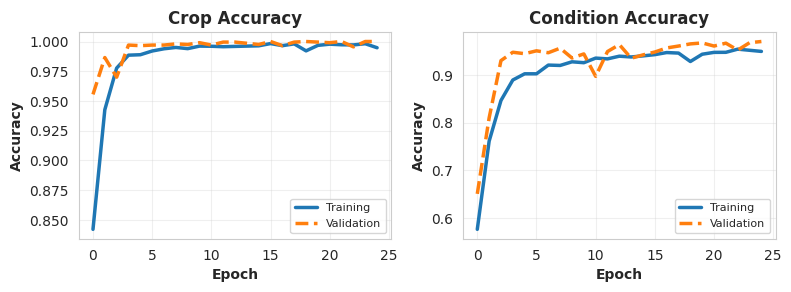

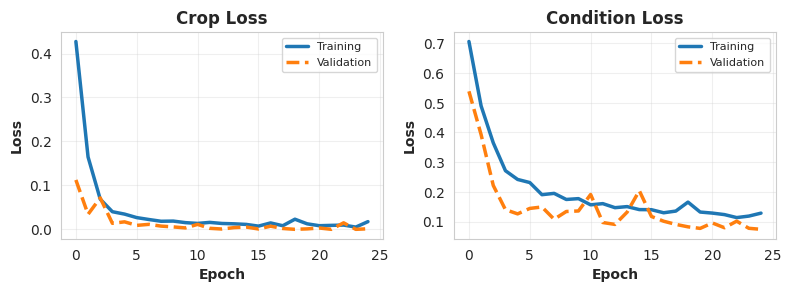

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for professional look
sns.set_style("whitegrid")


# Create figure with two subplots for accuracy
plt.figure(figsize=(8, 3))  # Compact size for paper

# Plot Fruit Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['crop_accuracy'], label='Training', color='#1f77b4', linewidth=2.5)
plt.plot(history.history['val_crop_accuracy'], label='Validation', color='#ff7f0e', linewidth=2.5, linestyle='--')
plt.title('Crop Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Epoch', fontsize=10, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8)

# Plot Condition Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['condition_accuracy'], label='Training', color='#1f77b4', linewidth=2.5)
plt.plot(history.history['val_condition_accuracy'], label='Validation', color='#ff7f0e', linewidth=2.5, linestyle='--')
plt.title('Condition Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Epoch', fontsize=10, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8)

plt.tight_layout(pad=1.0)
plt.savefig('/kaggle/working/accuracy_curves_bold.png', dpi=300, bbox_inches='tight')
plt.show()

# Create figure with two subplots for loss
plt.figure(figsize=(8, 3))  # Compact size for paper

# Plot Fruit Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['crop_loss'], label='Training', color='#1f77b4', linewidth=2.5)
plt.plot(history.history['val_crop_loss'], label='Validation', color='#ff7f0e', linewidth=2.5, linestyle='--')
plt.title('Crop Loss', fontsize=12, fontweight='bold')
plt.xlabel('Epoch', fontsize=10, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8)

# Plot Condition Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['condition_loss'], label='Training', color='#1f77b4', linewidth=2.5)
plt.plot(history.history['val_condition_loss'], label='Validation', color='#ff7f0e', linewidth=2.5, linestyle='--')
plt.title('Condition Loss', fontsize=12, fontweight='bold')
plt.xlabel('Epoch', fontsize=10, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8)

plt.tight_layout(pad=1.0)
plt.savefig('/kaggle/working/loss_curves_bold.png', dpi=300, bbox_inches='tight')
plt.show()

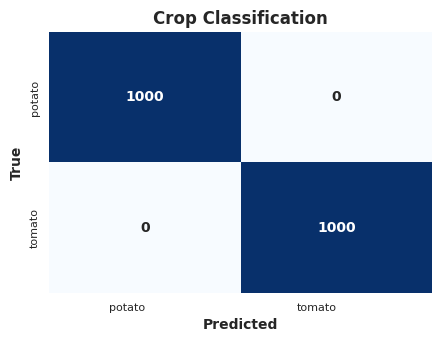

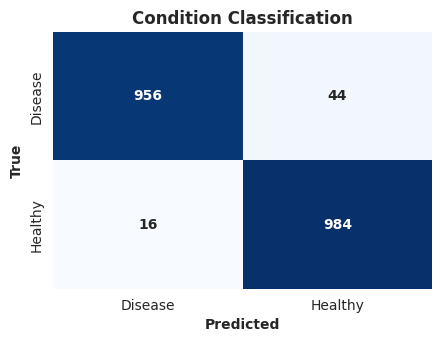

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define dict_generator function
def dict_generator(generator, crop_dim):
    for x_batch, y_batch in generator:
        yield x_batch, {
            'crop': y_batch[:, :crop_dim],
            'condition': y_batch[:, crop_dim:]
        }

# Re-create val_gen to ensure fresh iteration
val_generator_raw.reset()  # Reset the Keras generator
val_gen = dict_generator(val_generator_raw, crop_dim=len(crop_cols))

# Collect true and predicted labels
y_true_crop = []
y_true_condition = []
y_pred_crop = []
y_pred_condition = []

# Iterate through val_gen to get predictions
for _ in range(len(val_generator_raw)):
    x_batch, y_batch = next(val_gen)
    predictions = vit_model.predict(x_batch, verbose=0)
    
    # True labels from dict_generator output
    y_true_crop.extend(np.argmax(y_batch['crop'], axis=1))
    y_true_condition.extend(np.argmax(y_batch['condition'], axis=1))
    
    # Predicted labels
    y_pred_crop.extend(np.argmax(predictions[0], axis=1))  # Crop predictions
    y_pred_condition.extend(np.argmax(predictions[1], axis=1))  # Condition predictions

# Convert to numpy arrays
y_true_crop = np.array(y_true_crop)
y_true_condition = np.array(y_true_condition)
y_pred_crop = np.array(y_pred_crop)
y_pred_condition = np.array(y_pred_condition)

# Compute confusion matrices
cm_crop = confusion_matrix(y_true_crop, y_pred_crop)
cm_condition = confusion_matrix(y_true_condition, y_pred_condition)

# Set Seaborn style for professional look
sns.set_style("whitegrid")

# Plot Fruit Confusion Matrix with rotated x-axis labels
plt.figure(figsize=(4.5, 3.5))  # Slightly larger for label spacing
sns.heatmap(cm_crop, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=crop_encoder.classes_, yticklabels=crop_encoder.classes_,
            annot_kws={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Crop Classification', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=10, fontweight='bold')
plt.ylabel('True', fontsize=10, fontweight='bold')
plt.xticks(ha='right', fontsize=8)  # Rotate x-axis labels
plt.yticks(fontsize=8)  # Smaller y-axis font size
plt.tight_layout(pad=1.0)
plt.savefig('/kaggle/working/crop_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot Condition Confusion Matrix (unchanged)
plt.figure(figsize=(4.5, 3.5))  # Smaller size for 2x2 matrix
sns.heatmap(cm_condition, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Disease', 'Healthy'], yticklabels=['Disease', 'Healthy'],
            annot_kws={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Condition Classification', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=10, fontweight='bold')
plt.ylabel('True', fontsize=10, fontweight='bold')
plt.tight_layout(pad=1.0)
plt.savefig('/kaggle/working/condition_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd

# Define dict_generator function
def dict_generator(generator, crop_dim):
    for x_batch, y_batch in generator:
        yield x_batch, {
            'crop': y_batch[:, :crop_dim],
            'condition': y_batch[:, crop_dim:]
        }

# Re-create val_gen to ensure fresh iteration
val_generator_raw.reset()  # Reset the Keras generator
val_gen = dict_generator(val_generator_raw, crop_dim=len(crop_cols))

# Collect true and predicted labels
y_true_crop = []
y_true_condition = []
y_pred_crop = []
y_pred_condition = []

# Iterate through val_gen to get predictions
for _ in range(len(val_generator_raw)):
    x_batch, y_batch = next(val_gen)
    predictions = vit_model.predict(x_batch, verbose=0)
    
    # True labels from dict_generator output
    y_true_crop.extend(np.argmax(y_batch['crop'], axis=1))
    y_true_condition.extend(np.argmax(y_batch['condition'], axis=1))
    
    # Predicted labels
    y_pred_crop.extend(np.argmax(predictions[0], axis=1))  # Fruit predictions
    y_pred_condition.extend(np.argmax(predictions[1], axis=1))  # Condition predictions

# Convert to numpy arrays
y_true_crop = np.array(y_true_crop)
y_true_condition = np.array(y_true_condition)
y_pred_crop = np.array(y_pred_crop)
y_pred_condition = np.array(y_pred_condition)

# Generate classification reports
crop_report = classification_report(y_true_crop, y_pred_crop, target_names=crop_encoder.classes_, output_dict=True)
condition_report = classification_report(y_true_condition, y_pred_condition, target_names=['Disease', 'Healthy'], output_dict=True)

# Convert to DataFrames with custom formatting
crop_df = pd.DataFrame(crop_report).transpose()
crop_df['precision'] = crop_df['precision'].round(2)
crop_df['recall'] = crop_df['recall'].round(2)
crop_df['f1-score'] = crop_df['f1-score'].round(2)
crop_df['support'] = crop_df['support'].astype(int)  # Keep support as integer

condition_df = pd.DataFrame(condition_report).transpose()
condition_df['precision'] = condition_df['precision'].round(2)
condition_df['recall'] = condition_df['recall'].round(2)
condition_df['f1-score'] = condition_df['f1-score'].round(2)
condition_df['support'] = condition_df['support'].astype(int)  # Keep support as integer

# Print Crop classification report
print("Crop Classification Report:")
print(crop_df[['precision', 'recall', 'f1-score', 'support']])

# Print condition classification report
print("\nCondition Classification Report:")
print(condition_df[['precision', 'recall', 'f1-score', 'support']])

# Save reports as Markdown tables for paper
with open('/kaggle/working/crop_classification_report.md', 'w') as f:
    f.write("### Crop Classification Report\n")
    f.write(crop_df[['precision', 'recall', 'f1-score', 'support']].to_markdown(index=True, floatfmt=".2f"))

with open('/kaggle/working/condition_classification_report.md', 'w') as f:
    f.write("### Condition Classification Report\n")
    f.write(condition_df[['precision', 'recall', 'f1-score', 'support']].to_markdown(index=True, floatfmt=".2f"))

# LaTeX table for fruit classification
crop_latex = crop_df[['precision', 'recall', 'f1-score', 'support']].to_latex(
    index=True, caption="Crop Classification Metrics", label="tab:crop_metrics", float_format="%.2f"
)
with open('/kaggle/working/crop_classification_report.tex', 'w') as f:
    f.write(crop_latex)

# LaTeX table for condition classification
condition_latex = condition_df[['precision', 'recall', 'f1-score', 'support']].to_latex(
    index=True, caption="Condition Classification Metrics", label="tab:condition_metrics", float_format="%.2f"
)
with open('/kaggle/working/condition_classification_report.tex', 'w') as f:
    f.write(condition_latex)

Crop Classification Report:
              precision  recall  f1-score  support
potato              1.0     1.0       1.0     1000
tomato              1.0     1.0       1.0     1000
accuracy            1.0     1.0       1.0        1
macro avg           1.0     1.0       1.0     2000
weighted avg        1.0     1.0       1.0     2000

Condition Classification Report:
              precision  recall  f1-score  support
Disease            0.98    0.96      0.97     1000
Healthy            0.96    0.98      0.97     1000
accuracy           0.97    0.97      0.97        0
macro avg          0.97    0.97      0.97     2000
weighted avg       0.97    0.97      0.97     2000


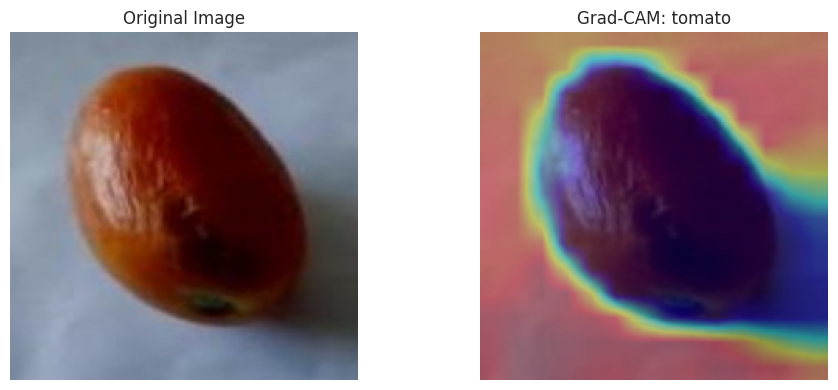

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Grad-CAM for Vision Transformer
def gradcam_vit_custom(vit_model, img_array, patch_layer_name, output_name, class_index=None):
    try:
        patch_layer = vit_model.get_layer(patch_layer_name)

        grad_model = tf.keras.Model(
            inputs=vit_model.input,
            outputs=[patch_layer.output, vit_model.get_layer(output_name).output]
        )

        with tf.GradientTape() as tape:
            inputs = tf.convert_to_tensor(img_array)
            tape.watch(inputs)
            patch_out, preds = grad_model(inputs)
            if class_index is None:
                class_index = tf.argmax(preds[0])
            target = preds[:, class_index]

        grads = tape.gradient(target, patch_out)
        weights = tf.reduce_mean(grads, axis=1)  # shape: (batch, projection_dim)
        cam = tf.reduce_sum(weights[:, tf.newaxis, :] * patch_out, axis=-1)[0]  # shape: (num_patches,)

        # Reshape to grid
        num_patches = cam.shape[0]
        grid_size = int(np.sqrt(num_patches))
        cam = cam[:grid_size * grid_size]  # trim if needed
        cam = tf.reshape(cam, (grid_size, grid_size))

        # Normalize heatmap
        heatmap = tf.maximum(cam, 0) / tf.reduce_max(cam)
        return heatmap.numpy(), int(class_index.numpy())

    except Exception as e:
        print(f"[ERROR] Grad-CAM failed: {e}")
        raise e

# Heatmap overlay
def overlay_heatmap(img_path, heatmap, label_name="", alpha=0.4):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError("Image not found:", img_path)
    img = cv2.resize(img, (224, 224))

    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.title(f"Grad-CAM: {label_name}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# Example usage
img_path = "/kaggle/working/custom_dataset/tomato/disease/damaged_d (100).jpg"
img_array = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img_array) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Grad-CAM for crop head
heatmap, class_idx = gradcam_vit_custom(
    vit_model,
    img_array,
    patch_layer_name="reshape",  # your patch output is "reshape"
    output_name="crop"  # or "condition"
)

# Optional: map class index to label
labels = ['potato', 'tomato']  # update this list as per your use case
label = labels[class_idx] if class_idx < len(labels) else f"Class {class_idx}"

# Show heatmap
overlay_heatmap(img_path, heatmap, label)


In [22]:
vit_model.save("vit_model.keras")
print("Model saved successfully.")


Model saved successfully.


In [23]:
print(vit_model.output_names)  # Should return ['crop', 'condition']


ListWrapper(['crop', 'condition'])


In [24]:
vit_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │     49,216 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 196, 64)   │          0 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 196, 64)   │          0 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 196, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 196, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 196, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 196, 128)  │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 196, 64)   │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 196, 64)   │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 196, 64)   │          0 │ dropout_2[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 196, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 196, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 196, 128)  │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 21,420,110 (81.71 MB)

 Trainable params: 7,140,036 (27.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,280,074 (54.47 MB)

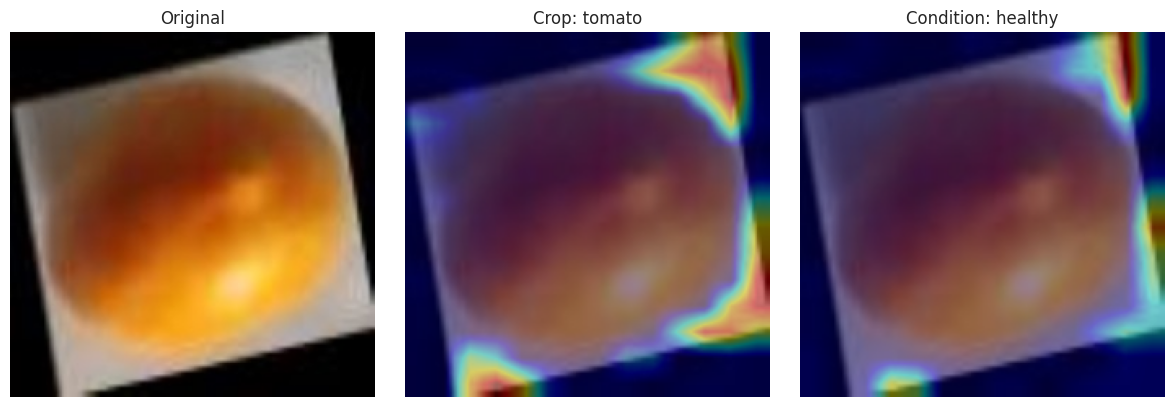

✅ Grad-CAM saved to: mode_explain.jpg


In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Grad-CAM for Vision Transformer
def gradcam_vit_custom(vit_model, img_array, patch_layer_name, output_name, class_index=None):
    patch_layer = vit_model.get_layer(patch_layer_name)

    grad_model = tf.keras.Model(
        inputs=vit_model.input,
        outputs=[patch_layer.output, vit_model.get_layer(output_name).output]
    )

    with tf.GradientTape() as tape:
        inputs = tf.convert_to_tensor(img_array)
        tape.watch(inputs)
        patch_out, preds = grad_model(inputs)
        if class_index is None:
            class_index = tf.argmax(preds[0])
        target = preds[:, class_index]

    grads = tape.gradient(target, patch_out)
    weights = tf.reduce_mean(grads, axis=1)
    cam = tf.reduce_sum(weights[:, tf.newaxis, :] * patch_out, axis=-1)[0]

    num_patches = cam.shape[0]
    grid_size = int(np.sqrt(num_patches))
    cam = cam[:grid_size * grid_size]
    cam = tf.reshape(cam, (grid_size, grid_size))
    heatmap = tf.maximum(cam, 0) / tf.reduce_max(cam)
    return heatmap.numpy(), int(class_index.numpy())

# Create overlay image with heatmap
def generate_overlay(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Image not found: {img_path}")
    img = cv2.resize(img, (224, 224))

    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return img, overlay

# Run Grad-CAM for one output head
def run_gradcam_for_head(vit_model, img_array, patch_layer_name, output_name, class_labels):
    heatmap, class_idx = gradcam_vit_custom(vit_model, img_array, patch_layer_name, output_name)
    label = class_labels[class_idx] if class_idx < len(class_labels) else f"Class {class_idx}"
    return heatmap, label

# Full Grad-CAM visualization and saving
def process_and_save_gradcam(vit_model, img_path, patch_layer_name, crop_labels, condition_labels, output_path):
    # Load and preprocess image
    img_array = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img_array) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Grad-CAM for crop
    heatmap_crop, crop_label = run_gradcam_for_head(vit_model, img_array, patch_layer_name, "crop", crop_labels)
    # Grad-CAM for condition
    heatmap_cond, cond_label = run_gradcam_for_head(vit_model, img_array, patch_layer_name, "condition", condition_labels)

    # Create overlays
    original_img, overlay_crop = generate_overlay(img_path, heatmap_crop)
    _, overlay_cond = generate_overlay(img_path, heatmap_cond)

    # Plot and save
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original")
    axs[1].imshow(cv2.cvtColor(overlay_crop, cv2.COLOR_BGR2RGB))
    axs[1].set_title(f"Crop: {crop_label}")
    axs[2].imshow(cv2.cvtColor(overlay_cond, cv2.COLOR_BGR2RGB))
    axs[2].set_title(f"Condition: {cond_label}")

    for ax in axs:
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

    print(f"✅ Grad-CAM saved to: {output_path}")

# ========== USAGE ==========

# Your trained ViT model
# vit_model = ...  # Must be already defined and loaded

img_path = "/kaggle/working/custom_dataset/tomato/healthy/ripe_r (1013).jpg"
output_file = "mode_explain.jpg"

# Labels (adjust to match your model)
crop_labels = ['potato', 'tomato']
condition_labels = ['diseased', 'healthy']

# Call the function
process_and_save_gradcam(
    vit_model,
    img_path,
    patch_layer_name="reshape",  # Change if needed
    crop_labels=crop_labels,
    condition_labels=condition_labels,
    output_path=output_file
)
